In [1]:
%cd ..

/media/atem/Data/HSE_videos/Project/sheaf-convolution


/media/atem/Data/HSE_videos/Project/sheaf-convolution/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [20]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from utils_comet import export_synth_exp_group_table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_NAME = "sheaf-diffusion"
WORKSPACE_NAME = "artem-d"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df_size = export_synth_exp_group_table(WORKSPACE_NAME, PROJECT_NAME, "nproj_effect")

In [12]:
df_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model_name            30 non-null     object 
 1   model/total_params    30 non-null     int64  
 2   best_epoch            30 non-null     int64  
 3   best_val_ap           30 non-null     float64
 4   best_val_auc          30 non-null     float64
 5   test_ap_at_best_val   30 non-null     float64
 6   test_auc_at_best_val  30 non-null     float64
 7   dataset/name          30 non-null     object 
 8   dataset/num_nodes     30 non-null     int64  
 9   dataset/num_edges     30 non-null     int64  
 10  dataset/num_features  30 non-null     int64  
 11  dataset/nproj         30 non-null     int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 2.9+ KB


In [18]:
df_size.groupby(['model_name', 'dataset/nproj']).mean(numeric_only=True)

model/total_params   best_epoch  best_val_ap  \
model_name dataset/nproj                                                 
Diffusion  1                         17354.0   687.000000     0.995920   
           2                         17354.0  1752.333333     0.977771   
           4                         17354.0  1900.333333     0.848463   
           6                         17354.0  1806.000000     0.763165   
           8                         17354.0  1903.333333     0.726204   
GAE        1                         17728.0  1781.666667     0.995442   
           2                         17728.0  1829.666667     0.933516   
           4                         17728.0  1879.333333     0.722005   
           6                         17728.0  1578.000000     0.644885   
           8                         17728.0  1706.666667     0.611693   

                          best_val_auc  test_ap_at_best_val  \
model_name dataset/nproj                                      
Diffusion  1                  0.996149             0.993247   
           2                  0.980961             0.977189   
           4                  0.857044             0.846931   
           6                  0.773045             0.765583   
           8                  0.735458             0.719460   
GAE        1                  0.995755             0.993495   
           2                  0.940312             0.933374   
           4                  0.744451             0.722159   
           6                  0.663067             0.639519   
           8                  0.627309             0.601129   

                          test_auc_at_best_val  dataset/num_nodes  \
model_name dataset/nproj                                            
Diffusion  1                          0.994022             1000.0   
           2                          0.980688             1000.0   
           4                          0.857314             1000.0   
           6                          0.776026             1000.0   
           8                          0.732159             1000.0   
GAE        1                          0.994915             1000.0   
           2                          0.940363             1000.0   
           4                          0.743571             1000.0   
           6                          0.661438             1000.0   
           8                          0.621663             1000.0   

                          dataset/num_edges  dataset/num_features  
model_name dataset/nproj                                           
Diffusion  1                         1792.0                  16.0  
           2                         3543.0                  16.0  
           4                         6916.0                  16.0  
           6                        10011.0                  16.0  
           8                        12907.0                  16.0  
GAE        1                         1792.0                  16.0  
           2                         3543.0                  16.0  
           4                         6916.0                  16.0  
           6                        10011.0                  16.0  
           8                        12907.0                  16.0

In [19]:
agg = (
    df_size.groupby(["model_name", "dataset/nproj"])
      .agg(
          mean_ap=("test_ap_at_best_val", "mean"),
          std_ap=("test_ap_at_best_val", "std")
      )
      .reset_index()
)

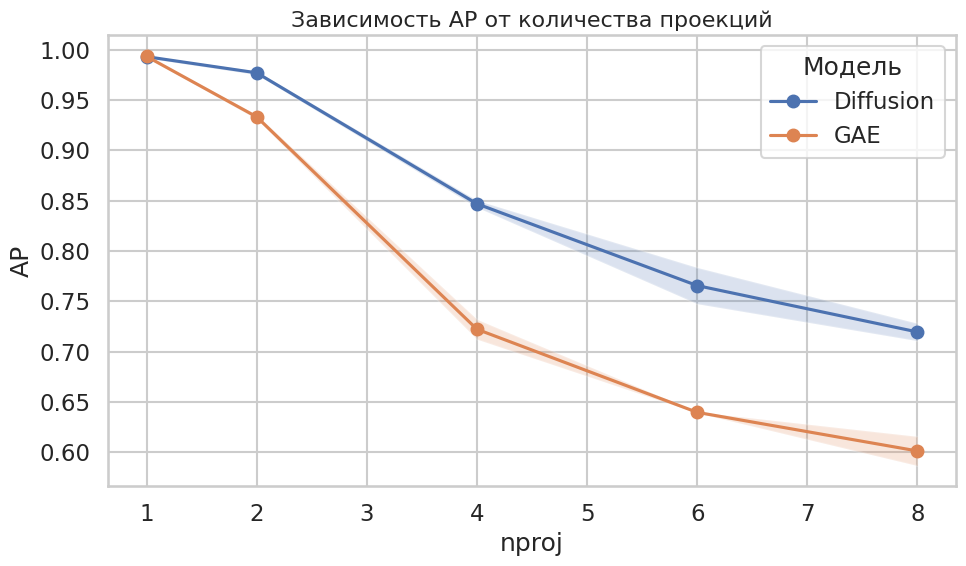

In [24]:
sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

for model in agg["model_name"].unique():
    sub = agg[agg["model_name"] == model]
    
    # Линия среднего
    plt.plot(sub["dataset/nproj"], sub["mean_ap"], marker="o", label=model)
    
    # Область стандартного отклонения
    plt.fill_between(
        sub["dataset/nproj"],
        sub["mean_ap"] - sub["std_ap"],
        sub["mean_ap"] + sub["std_ap"],
        alpha=0.2
    )

plt.title("Зависимость AP от количества проекций", fontsize=16)
plt.xlabel("nproj")
plt.ylabel("AP")
plt.legend(title="Модель")
plt.tight_layout()
plt.show()